In [10]:
import numpy as np
import pdb
import scipy
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [11]:
# loadmat function loads the file into a dictionary
preprocessed = loadmat('MT063_20190909_preprocessed_rasters.mat')
# neurons selected based on the mean response criteria
neurons_with_fr_and_Ca_response = np.where(preprocessed['diff_mean_responsive_cells'][0] == 1)[0]
print(neurons_with_fr_and_Ca_response)

[  4   6   8  15  17  28  29  33  34  37  39  43  56  73  74  79  80  83
  94 114 124 127 134 143 184]


(25, 210)
(25, 2)
[0.13679125 0.12199066]


(None, None, None)

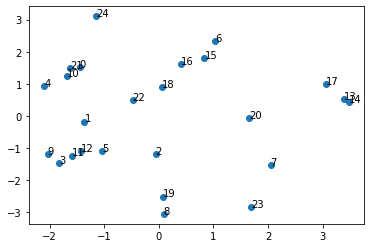

In [12]:
averaged_responses = preprocessed['raster_ordered_poststim'][:,neurons_with_fr_and_Ca_response]
# shuffling responses to ensure no trivial correlation is found
averaged_responses = np.transpose(averaged_responses)
s = np.arange(averaged_responses.shape[0])
np.random.shuffle(s)
shuffled_avg_responses = averaged_responses[:,s]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(shuffled_avg_responses)

fig, ax = plt.subplots()
ax.scatter(principalComponents[:,0],principalComponents[:,1])
for i in s:
    ax.annotate(str(i), (principalComponents[i,0],principalComponents[i,1]))
    
print(averaged_responses.shape), print(principalComponents.shape), print(pca.explained_variance_ratio_)  

In [29]:
zscored_responses_tseries = \
preprocessed['raster_ordered_smoothed_mean_n_by_ct'][:,neurons_with_fr_and_Ca_response]
zscored_responses_tseries = np.transpose(zscored_responses_tseries)
pca = PCA(n_components=6)
pc_tseries = pca.fit_transform(zscored_responses_tseries)
print(preprocessed['raster_ordered_smoothed_mean_n_by_ct'].shape, \
zscored_responses_tseries.shape, pc_tseries.shape, pca.explained_variance_ratio_, pca.components_.shape)


(3801, 197) (25, 3801) (25, 6) [0.28790716 0.13515082 0.08136608 0.07227382 0.04724    0.03696887] (6, 3801)


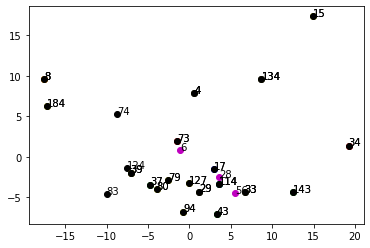

In [34]:
fig, ax = plt.subplots()
if zscored_responses_tseries.shape[0] < preprocessed['raster_ordered_smoothed_n_by_ct'].shape[1]:
    for i in s:
        neuron = neurons_with_fr_and_Ca_response[s[i]]
        if neuron in preprocessed['Ind_CellSelection'][2][0]-1:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='r')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))
        if neuron in preprocessed['Ind_CellSelection'][3][0]-1:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='b')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))    
        if neuron in preprocessed['Ind_CellSelection'][4][0]-1:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='y')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))    
        if neuron in preprocessed['Ind_CellSelection'][5][0]-1:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='g')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))    
        if neuron in preprocessed['Ind_CellSelection'][6][0]-1:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='m')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))
        else:
            ax.scatter(pc_tseries[i,0],pc_tseries[i,1],c='k')
            ax.annotate(str(neuron), (pc_tseries[i,0],pc_tseries[i,1]))    

In [7]:
neurons_with_fr_and_Ca_response

array([  4,   6,   8,  15,  17,  28,  29,  33,  34,  37,  39,  43,  56,
        73,  74,  79,  80,  83,  94, 114, 124, 127, 134, 143, 184])

In [33]:
preprocessed['Ind_CellSelection'][2][0]

array([[  3],
       [  9],
       [ 17],
       [ 22],
       [ 23],
       [ 27],
       [ 32],
       [ 35],
       [ 40],
       [ 46],
       [ 62],
       [ 68],
       [ 69],
       [ 74],
       [ 79],
       [ 91],
       [ 92],
       [ 97],
       [102],
       [113],
       [114],
       [118],
       [138],
       [143],
       [149],
       [155],
       [156],
       [159],
       [166],
       [168],
       [169],
       [172],
       [177],
       [184],
       [192],
       [197]], dtype=uint8)